In [1]:
import yfinance as yf
import pandas as pd

data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
print(data.tail())


<ipython-input-1-1053551222>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-12-23  254.655716  255.034791  252.840088  254.156919  40858800
2024-12-24  257.578674  257.588630  254.675658  254.875189  23234700
2024-12-26  258.396667  259.474086  257.010028  257.568678  27237100
2024-12-27  254.974930  258.077462  252.451019  257.209530  42355300
2024-12-30  251.593079  252.889953  250.146571  251.623005  35557500


In [2]:
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [5]:
# Train Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [6]:
# Predict
predictions = model.predict(X_test)

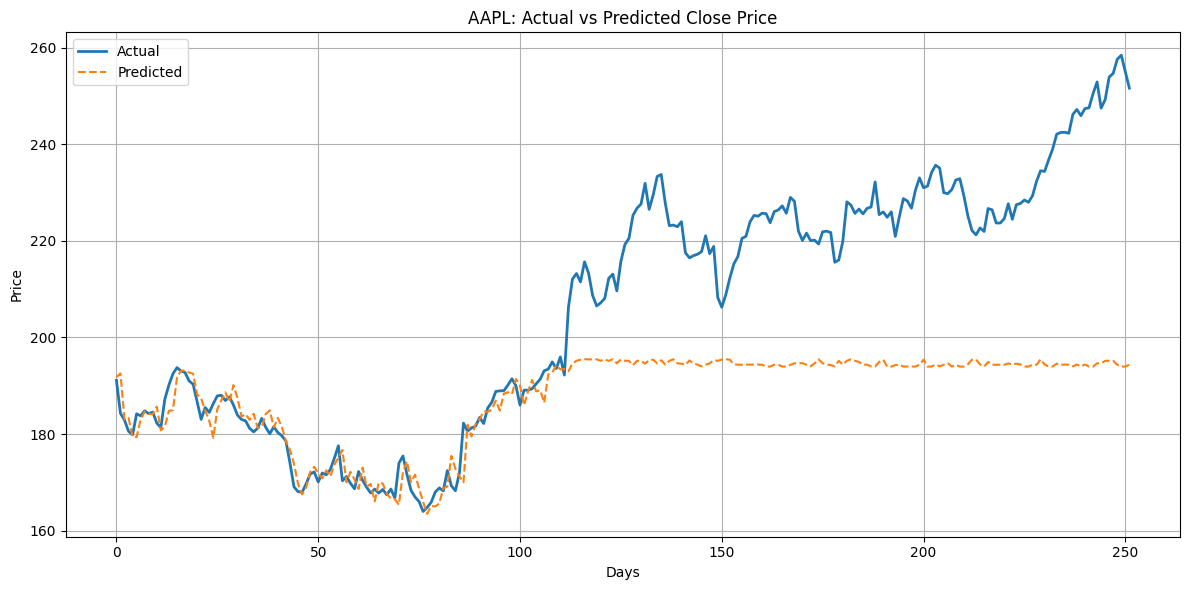

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(predictions, label="Predicted", linestyle='--')
plt.legend()
plt.title("AAPL: Actual vs Predicted Close Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 656.35
